In [1]:
import pandas as pd
import numpy as np

# Plotting and correlation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy import stats

# Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

Use monthly EV PERCENTAGE to predict distribution of other vehicle types

**Load data**

In [29]:
fuel_types = ['electric','plug-in hybrid electric','fuel cell','diesel','flex fuel','gasoline','gasoline hybrid','natural gas','propane']

# Monthly vehicle distribution by percentage

df = pd.read_csv('data/cleaned/monthly_vehicles_percentages.csv')
df.drop(['Unnamed: 0','date','total','date_idx'], axis=1, inplace=True)

print(f"shape: {df.shape}")
df.head()

shape: (96, 9)


,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas,propane
0,1.744799,1.019652,0.033788,1.971173,4.037623,86.828548,4.335865,0.028241,0.000311
1,1.708267,1.010384,0.033074,2.008966,4.034024,86.865183,4.311443,0.028124,0.000536
2,1.671473,1.001049,0.032355,2.047029,4.030399,86.902081,4.286846,0.028006,0.000764
3,1.634414,0.991647,0.031630,2.085366,4.026748,86.939243,4.262072,0.027887,0.000992
4,1.597089,0.982178,0.030901,2.123979,4.023070,86.976673,4.237120,0.027767,0.001223


**Correlation**

<AxesSubplot: >

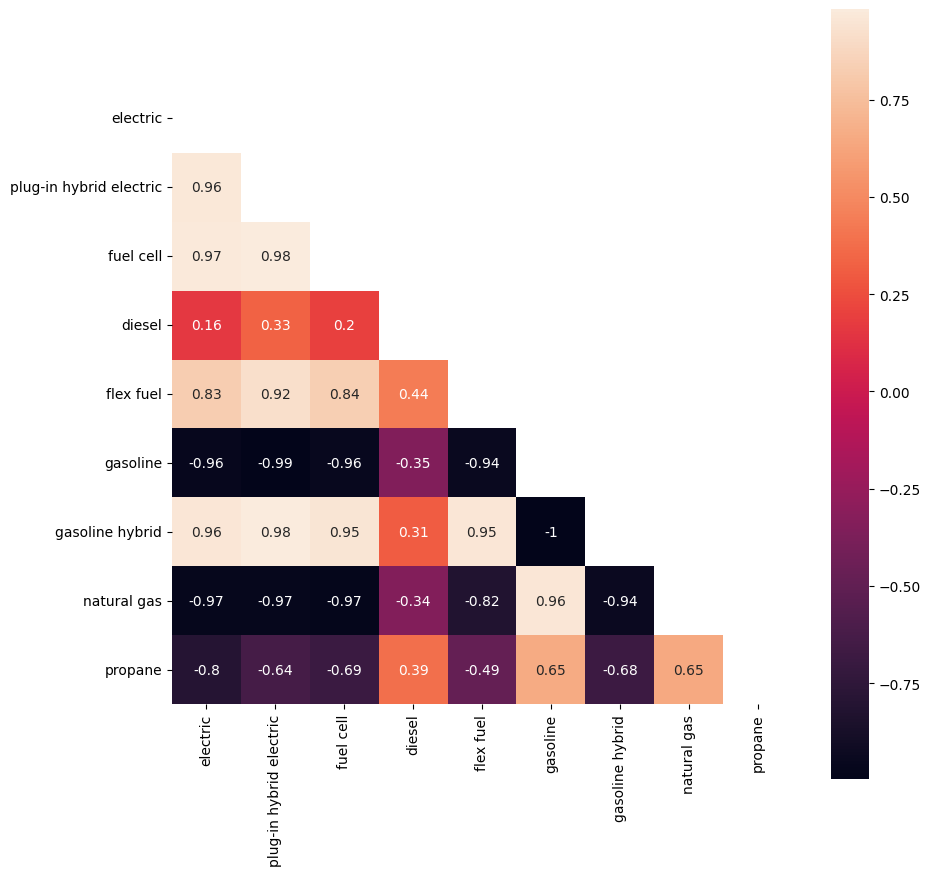

In [30]:
correlation = df.corr(method = 'pearson')
plt.subplots(figsize = (10,10))
masked = np.triu(np.ones_like(correlation, dtype=bool)) 
sns.heatmap(correlation,mask=masked,square = True, annot = True)

**Linear regression**

In [31]:
print('Correlation coefficient with electric')
for fuel in fuel_types:
  if fuel != 'electric':
    X = df["electric"]
    y = df[fuel]

    slope, intercept, r, p, std_err = stats.linregress(X, y)

    def lin_func(X):
      return slope * X + intercept

    print(f'{fuel}: {r}')

Correlation coefficient with electric
plug-in hybrid electric: 0.9637315112369429
fuel cell: 0.9729573196896291
diesel: 0.16275320157631168
flex fuel: 0.8263723632819405
gasoline: -0.9620949496382236
gasoline hybrid: 0.9579581421217365
natural gas: -0.9671483050047369
propane: -0.8012788665451078


**Polynomial regression**

In [32]:
for fuel in fuel_types:
    if fuel != 'electric' and fuel != 'gasoline':
        X = df["electric"]
        y = df[fuel]

        poly_model = np.poly1d(np.polyfit(X, y, 3))
        poly_line = np.linspace(0, 3, 1000)
        prediction = poly_model(3)
        if prediction < 0:
            prediction = 0
        print(f'r2 score for {fuel}: {r2_score(y, poly_model(X))}')

r2 score for plug-in hybrid electric: 0.9968402572293352
r2 score for fuel cell: 0.969049409282838
r2 score for diesel: 0.7471600870500922
r2 score for flex fuel: 0.9799548636948252
r2 score for gasoline hybrid: 0.9947814033126783
r2 score for natural gas: 0.9897618427726534
r2 score for propane: 0.9917846896331337


**Prediction model**

if EVs represent 1.75%, other vehicle types will represent roughly:
plug-in hybrid electric: 0.86%
fuel cell: 0%
diesel: 0%
flex fuel: 9.93%
gasoline hybrid: 10.69%
natural gas: 0.08%
propane: 0%
gasoline: 86.64%


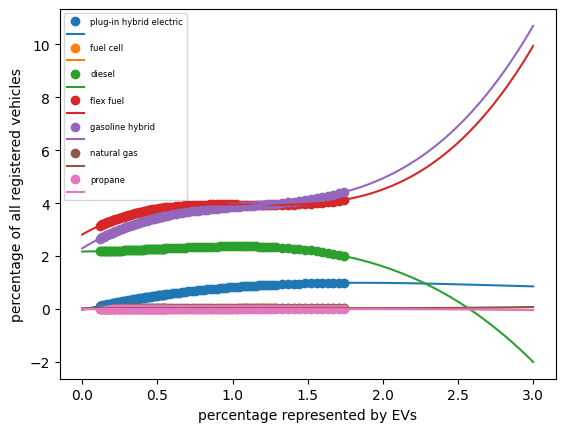

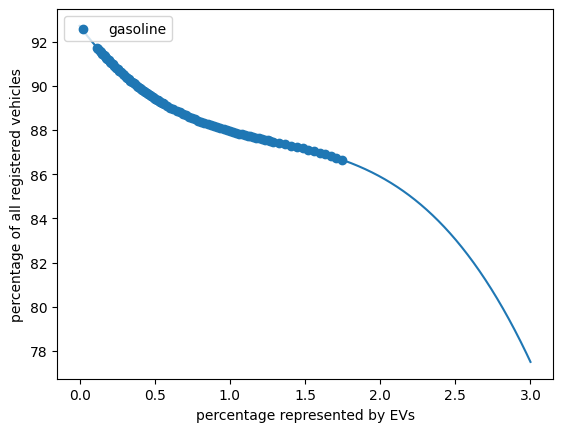

In [33]:
legend = []
PRECENT_EV = 1.75

print(f'if EVs represent {PRECENT_EV}%, other vehicle types will represent roughly:')

# create polynomial regression model for each fuel
for fuel in fuel_types:
    if fuel != 'electric' and fuel != 'gasoline':
        X = df["electric"]
        y = df[fuel]

        poly_model = np.poly1d(np.polyfit(X, y, 3))
        poly_line = np.linspace(0, 3, 1000)
        prediction = poly_model(3)
        if prediction < 0:
            prediction = 0
        print(f'{fuel}: {round(prediction,2)}%')
        legend.append(fuel)
        legend.append('')
        plt.scatter(X,poly_model(X))
        plt.plot(poly_line, poly_model(poly_line))

# polynomial regression model for gasoline
X = df["electric"]
y = df['gasoline']

poly_model = np.poly1d(np.polyfit(X, y, 3))
poly_line = np.linspace(0, 3, 1000)

prediction = poly_model(PRECENT_EV)
if prediction < 0:
    prediction = 0
print(f'gasoline: {round(prediction,2)}%')

# Graph with all fuels (minus gasoline)
plt.legend(legend,loc='upper left',prop={'size': 6},fontsize='large')
plt.ylabel('percentage of all registered vehicles')
plt.xlabel('percentage represented by EVs')
plt.show()

# Graph with only gasoline due to scale
legend = ['gasoline']
plt.scatter(X,poly_model(X))
plt.plot(poly_line, poly_model(poly_line),label='gasoline')
plt.legend(legend,loc='upper left',prop={'size': 10})
plt.ylabel('percentage of all registered vehicles')
plt.xlabel('percentage represented by EVs')
plt.show()